# **Taxi Fare Prediction with Feature Transformation and Regularization**

In [1]:
## Importing Package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Import Data

In [3]:
df = pd.read_csv('taxi.csv')
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0


## **Quick EDA**

In [4]:
## Check Missing Value

In [5]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      1
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18919 entries, 0 to 18918
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        18919 non-null  float64
 1   pickup_datetime    18919 non-null  object 
 2   pickup_longitude   18919 non-null  float64
 3   pickup_latitude    18919 non-null  float64
 4   dropoff_longitude  18919 non-null  float64
 5   dropoff_latitude   18919 non-null  float64
 6   passenger_count    18918 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.0+ MB


We can see that there is only 1 missing value in the dataset. Let's now proceed to handle the misisng value.

### Handling Missing Values

In [8]:
## Dropping Missing Value

df.dropna(inplace=True)

### Data Types Conversion

In [9]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

We can see that the 'pickup_datetime' features data types is still object. We need to convert the datatypes so later we can do feature extraction from the 'pickup_datetime' feature.

In [11]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [12]:
df.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

We can see that the 'pickup_datetime' feature has the data type of datetime. Now we can proceed with the EDA

### Data Describe

In [14]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,18918.000000,18918.000000,18918.000000,18918.000000,18918.000000,18918.000000
mean,11.289221,-72.486834,39.925272,-72.498734,39.913116,1.657205
std,9.551667,10.503808,6.715228,10.461670,6.160671,1.282236
min,-3.000000,-74.438233,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992223,40.734687,-73.991233,40.734589,1.000000
50%,8.500000,-73.981758,40.752620,-73.980234,40.753566,1.000000
75%,12.500000,-73.966788,40.767427,-73.963834,40.768067,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


From data describe, we cannot see any significant anomalies from the data. Thus, we can continue to feature extraction.

### Features Extraction - Datetime Extract

In [16]:
pickup_dt = df['pickup_datetime'].dt

In [17]:
df['year'] = pickup_dt.year ## Extract year
df['month'] = pickup_dt.month ## Extract month
df['day'] = pickup_dt.day ## Extract day
df['hour'] = pickup_dt.hour ## Extract hour

In [18]:
## Dropping the original pickup_datetime column

df.drop(columns='pickup_datetime', inplace=True)

In [19]:
## Simplify pickup and dropoff location features

df['distance'] = abs((df['pickup_longitude'] - df['dropoff_longitude']) + (df['pickup_latitude'] - df['dropoff_latitude']))

In [20]:
## Dropping the original pickup and dropoff columns

df.drop(columns=['pickup_longitude', 'dropoff_longitude', 'pickup_latitude', 'dropoff_latitude'], inplace=True)

In [21]:
## Final dataset

df.head()

,fare_amount,passenger_count,year,month,day,hour,distance
0,4.5,1.0,2009,6,15,17,0.006340
1,16.9,1.0,2010,1,5,16,0.107481
2,5.7,2.0,2011,8,18,0,0.019212
3,7.7,1.0,2012,4,21,4,0.020512
4,5.3,1.0,2010,3,9,7,0.027194


## **Machine Learning Modelling**

### Splitting Dataset

In [24]:
## Import package

from sklearn.model_selection import train_test_split

In [25]:
X = df.drop(columns='fare_amount')
y = df['fare_amount']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .15, random_state=42)

### Modeling 'Base' Model

In [30]:
## Import package

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#### Training Model

**Linear Regression**

In [32]:
model_LR = LinearRegression(fit_intercept=False)

In [33]:
model_LR.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [34]:
## Create def function for evaluation matrix

def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    R2 = r2_score(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    return R2, MAE, MSE, RMSE

In [35]:
r2_LR_tr, MAE_LR_tr, MSE_LR_tr, RMSE_LR_tr = Eva_Matrix(model_LR, X_train, y_train)

In [36]:
r2_LR_ts, MAE_LR_ts, MSE_LR_ts, RMSE_LR_ts = Eva_Matrix(model_LR, X_test, y_test)

In [37]:
eva_data = {
    'LinearReg Training' : [r2_LR_tr, MAE_LR_tr, MSE_LR_tr, RMSE_LR_tr],
    'LinearReg Testing' : [r2_LR_ts, MAE_LR_ts, MSE_LR_ts, RMSE_LR_ts]
}

df_LinReg = pd.DataFrame(eva_data, index=['R2', 'MAE', 'MSE', 'RMSE'])

**Ridge**

In [39]:
model_R = Ridge()

In [40]:
model_R.fit(X_train, y_train)

Ridge()

**Elastic Net**

In [42]:
model_E = ElasticNet()

In [43]:
model_E.fit(X_train, y_train)

ElasticNet()

In [44]:
## Create improved def function for training and test set

def Eva_Matrix_DF(Model, X_train, X_test, y_train, y_test, Name):
    y_pred_tr = Model.predict(X_train)
    R2_train = r2_score(y_train, y_pred_tr)
    MAE_train = mean_absolute_error(y_train, y_pred_tr)
    MSE_train = mean_squared_error(y_train, y_pred_tr)
    RMSE_train = np.sqrt(MSE_train)
    y_pred_ts = Model.predict(X_test)
    R2_test = r2_score(y_test, y_pred_ts)
    MAE_test = mean_absolute_error(y_test, y_pred_ts)
    MSE_test = mean_squared_error(y_test, y_pred_ts)
    RMSE_test = np.sqrt(MSE_test)
    eva_data = {
        'Training' + Name : [R2_train, MAE_train, MSE_train, RMSE_train],
        'Testing' + Name : [R2_test, MAE_test, MSE_test, RMSE_test]
    }
    df = pd.DataFrame(eva_data, index=['R2', 'MAE', 'MSE', 'RMSE'])
    
    return df

In [45]:
df_ridge = Eva_Matrix_DF(model_R, X_train, X_test, y_train, y_test, 'Ridge')

In [46]:
df_ridge

,TrainingRidge,TestingRidge
R2,0.016011,0.017165
MAE,5.942780,5.678294
MSE,90.844816,83.489652
RMSE,9.531255,9.137267


In [47]:
df_enet = Eva_Matrix_DF(model_E, X_train, X_test, y_train, y_test, 'ElasticNet')

In [48]:
df_enet

,TrainingElasticNet,TestingElasticNet
R2,0.013784,0.014032
MAE,5.956253,5.689524
MSE,91.050468,83.755871
RMSE,9.542037,9.151823


In [49]:
## Create another improved def function for evaluation matrix of training and test set

def Eva_Matrix_Base(model, X_train, X_test, y_train, y_test, Name):
    Model = model.fit(X_train, y_train)
    y_pred_tr = Model.predict(X_train)
    R2_train = r2_score(y_train, y_pred_tr)
    MAE_train = mean_absolute_error(y_train, y_pred_tr)
    MSE_train = mean_squared_error(y_train, y_pred_tr)
    RMSE_train = np.sqrt(MSE_train)
    y_pred_ts = Model.predict(X_test)
    R2_test = r2_score(y_test, y_pred_ts)
    MAE_test = mean_absolute_error(y_test, y_pred_ts)
    MSE_test = mean_squared_error(y_test, y_pred_ts)
    RMSE_test = np.sqrt(MSE_test)
    eva_data = {
        'Training ' + Name : [R2_train, MAE_train, MSE_train, RMSE_train],
        'Testing ' + Name : [R2_test, MAE_test, MSE_test, RMSE_test]
    }
    df = pd.DataFrame(eva_data, index=['R2', 'MAE', 'MSE', 'RMSE'])
    
    return Model, df

In [50]:
model_L, df_Lasso = Eva_Matrix_Base(Lasso(), X_train, X_test, y_train, y_test, 'Lasso')

In [51]:
df_Lasso

,Training Lasso,Testing Lasso
R2,0.011047,0.009871
MAE,5.970088,5.703573
MSE,91.303112,84.109328
RMSE,9.555266,9.171114


In [52]:
df_LinReg = Eva_Matrix_DF(model_LR, X_train, X_test, y_train, y_test, 'LinReg')

In [53]:
df_LinReg

,TrainingLinReg,TestingLinReg
R2,0.002133,0.003077
MAE,6.012494,5.744713
MSE,92.126114,84.686428
RMSE,9.598235,9.202523


**Evaluation Matrix Comparison for Based Model**

In [99]:
pd.concat([df_LinReg, df_ridge, df_Lasso, df_enet], axis=1).T

,R2,MAE,MSE,RMSE
TrainingLinReg,0.002133,6.012494,92.126114,9.598235
TestingLinReg,0.003077,5.744713,84.686428,9.202523
TrainingRidge,0.016011,5.942780,90.844816,9.531255
TestingRidge,0.017165,5.678294,83.489652,9.137267
Training Lasso,0.011047,5.970088,91.303112,9.555266
Testing Lasso,0.009871,5.703573,84.109328,9.171114
TrainingElasticNet,0.013784,5.956253,91.050468,9.542037
TestingElasticNet,0.014032,5.689524,83.755871,9.151823


From the evaluation matrix above, we can see that the based model have a low score. Let's now try to improve the ML model.

## **ML Improvement**

### Optimization 1

**Using Feature Engineering (Polynomial - Power Transformer)**

In [55]:
## Import Package

from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

In [56]:
poly = PolynomialFeatures(degree=3, include_bias = False)

In [57]:
## Power Transformer

In [58]:
yeo_pow = PowerTransformer('yeo-johnson')

In [60]:
num_col = df[['passenger_count', 'distance', 'year']] ## list of continous features

In [61]:
num_poly = poly.fit_transform(num_col)

In [62]:
num_pow = yeo_pow.fit_transform(num_poly)

In [63]:
num_pow

array([[-5.41041960e-01, -1.05323617e+00, -1.93067784e-13, ...,
        -1.18486758e+00, -7.17413724e-01,  4.22772928e-13],
       [-5.41041960e-01,  1.87884638e+00, -1.27398092e-13, ...,
         1.66386404e+00,  1.21254575e+00,  4.26325641e-13],
       [ 9.14193759e-01, -3.77609129e-01, -6.18394225e-14, ...,
        -3.82918519e-01, -7.30113075e-02,  4.29878355e-13],
       ...,
       [-5.41041960e-01, -6.25738617e-01,  1.33948408e-13, ...,
        -7.19249312e-01, -2.60688471e-01,  4.40314452e-13],
       [-5.41041960e-01, -1.07303399e+00,  1.99007477e-13, ...,
        -1.19943643e+00, -7.43065590e-01,  4.43867165e-13],
       [-5.41041960e-01, -3.22180680e-01, -6.18394225e-14, ...,
        -3.06516870e-01, -3.45565793e-02,  4.29878355e-13]])

In [64]:
## Create dataframe for the transformed features

df_pow = pd.DataFrame(num_pow)

In [65]:
df_pow.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.541042,-1.053236,-1.930678e-13,-0.600677,-1.081936,-0.514831,-0.495979,-0.882452,-1.869616e-13,-0.623728,-0.941961,-0.513990,-0.538653,-0.983503,-0.518532,-0.197541,-1.184868,-0.717414,4.227729e-13
1,-0.541042,1.878846,-1.273981e-13,-0.600677,1.278273,-0.514100,1.767568,1.333108,-1.860734e-13,-0.623728,0.626139,-0.513574,1.257450,0.956526,-0.517123,0.506135,1.663864,1.212546,4.263256e-13
2,0.914194,-0.377609,-6.183942e-14,1.185880,0.003999,0.577272,-0.420281,-0.076170,-1.852962e-13,1.262003,0.270707,0.646762,-0.409884,0.200604,0.557731,-0.193578,-0.382919,-0.073011,4.298784e-13
3,-0.541042,-0.316858,3.552714e-15,-0.600677,-0.547070,-0.512641,-0.408462,-0.025478,-1.845191e-13,-0.623728,-0.641979,-0.512742,-0.468091,-0.233355,-0.514305,-0.192686,-0.298870,-0.030280,4.333200e-13
4,-0.541042,-0.023812,-1.273981e-13,-0.600677,-0.326710,-0.514100,-0.335893,0.193551,-1.860734e-13,-0.623728,-0.511800,-0.513574,-0.409645,-0.041577,-0.517123,-0.186034,0.091814,0.155342,4.263256e-13


In [69]:
## Create new dataframe for improving machine learning modeling

df_1 = pd.concat([df.drop(columns=['passenger_count', 'distance', 'year']), df_pow], axis = 1)
df_1.head()

,fare_amount,month,day,hour,0,1,2,3,4,5,...,9,10,11,12,13,14,15,16,17,18
0,4.5,6,15,17,-0.541042,-1.053236,-1.930678e-13,-0.600677,-1.081936,-0.514831,...,-0.623728,-0.941961,-0.513990,-0.538653,-0.983503,-0.518532,-0.197541,-1.184868,-0.717414,4.227729e-13
1,16.9,1,5,16,-0.541042,1.878846,-1.273981e-13,-0.600677,1.278273,-0.514100,...,-0.623728,0.626139,-0.513574,1.257450,0.956526,-0.517123,0.506135,1.663864,1.212546,4.263256e-13
2,5.7,8,18,0,0.914194,-0.377609,-6.183942e-14,1.185880,0.003999,0.577272,...,1.262003,0.270707,0.646762,-0.409884,0.200604,0.557731,-0.193578,-0.382919,-0.073011,4.298784e-13
3,7.7,4,21,4,-0.541042,-0.316858,3.552714e-15,-0.600677,-0.547070,-0.512641,...,-0.623728,-0.641979,-0.512742,-0.468091,-0.233355,-0.514305,-0.192686,-0.298870,-0.030280,4.333200e-13
4,5.3,3,9,7,-0.541042,-0.023812,-1.273981e-13,-0.600677,-0.326710,-0.514100,...,-0.623728,-0.511800,-0.513574,-0.409645,-0.041577,-0.517123,-0.186034,0.091814,0.155342,4.263256e-13


### Machine Learning Modeling (Improved)

In [70]:
X_1 = df_1.drop(columns='fare_amount')
y_1 = df_1['fare_amount']

In [71]:
## Splitting Dataset

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, train_size=.85, random_state=42)

In [72]:
model, df_LinReg2 = Eva_Matrix_Base(LinearRegression(fit_intercept=False), X_train_1, X_test_1, y_train_1, y_test_1, "LinReg 2")

df_LinReg2

,Training LinReg 2,Testing LinReg 2
R2,0.498710,0.513402
MAE,3.578212,3.437498
MSE,46.280580,41.335457
RMSE,6.802983,6.429266


In [73]:
df_LinReg

,TrainingLinReg,TestingLinReg
R2,0.002133,0.003077
MAE,6.012494,5.744713
MSE,92.126114,84.686428
RMSE,9.598235,9.202523


We can see that the R2 score has improved significantly after we transformed the continous features. Now let's try to use regularization on the new dataset.

### Optimization 2

- Using Feature Engineering + Others Algorithm

In [74]:
model_R, df_ridge2 = Eva_Matrix_Base(Ridge(), X_train_1, X_test_1, y_train_1, y_test_1, 'Ridge')
df_ridge2

,Training Ridge,Testing Ridge
R2,0.486179,0.498328
MAE,3.639472,3.516353
MSE,47.437522,42.615923
RMSE,6.887490,6.528087


In [75]:
model_L, df_Lasso2 = Eva_Matrix_Base(Lasso(), X_train_1, X_test_1, y_train_1, y_test_1, 'Lasso')
df_Lasso2

,Training Lasso,Testing Lasso
R2,0.418618,0.431352
MAE,3.903154,3.741667
MSE,53.674974,48.305417
RMSE,7.326321,6.950210


In [76]:
model_E, df_enet2 = Eva_Matrix_Base(ElasticNet(), X_train_1, X_test_1, y_train_1, y_test_1, 'ElasticNet')
df_enet2

,Training ElasticNet,Testing ElasticNet
R2,0.409752,0.418252
MAE,3.975754,3.823235
MSE,54.493488,49.418263
RMSE,7.381970,7.029812


In [77]:
## Evaluation Matrix with transformed features

pd.concat([df_LinReg2, df_ridge2, df_Lasso2, df_enet2], axis=1).T

,R2,MAE,MSE,RMSE
Training LinReg 2,0.498710,3.578212,46.280580,6.802983
Testing LinReg 2,0.513402,3.437498,41.335457,6.429266
Training Ridge,0.486179,3.639472,47.437522,6.887490
Testing Ridge,0.498328,3.516353,42.615923,6.528087
Training Lasso,0.418618,3.903154,53.674974,7.326321
Testing Lasso,0.431352,3.741667,48.305417,6.950210
Training ElasticNet,0.409752,3.975754,54.493488,7.381970
Testing ElasticNet,0.418252,3.823235,49.418263,7.029812


In [100]:
## Evaluation Matrix without transformed features

pd.concat([df_LinReg, df_ridge, df_Lasso, df_enet], axis=1).T

,R2,MAE,MSE,RMSE
TrainingLinReg,0.002133,6.012494,92.126114,9.598235
TestingLinReg,0.003077,5.744713,84.686428,9.202523
TrainingRidge,0.016011,5.942780,90.844816,9.531255
TestingRidge,0.017165,5.678294,83.489652,9.137267
Training Lasso,0.011047,5.970088,91.303112,9.555266
Testing Lasso,0.009871,5.703573,84.109328,9.171114
TrainingElasticNet,0.013784,5.956253,91.050468,9.542037
TestingElasticNet,0.014032,5.689524,83.755871,9.151823


The evaluation matrix score has improved significantly on each algorithm. Let's try to improve further the evaluation matrix scoring with tuning. 

### Optimization 3

- with Manual Tuning

In [78]:
## Create Alpha list

Alpha = np.arange(0, 0.2, 0.0001)

In [79]:
## Create def function for the manual tuning

def Manual_Tune(Alpha, X_train, X_test, y_train, y_test, Model):
    train_r = []
    test_r = []

    for i in Alpha: # MeLooping nilai dari param_a
        model_R = Model(alpha=i)
        model_R.fit(X_train, y_train)
        y_pred_tr = model_R.predict(X_train)
        R2_train = r2_score(y_train,y_pred_tr)
        train_r.append(R2_train)
        y_pred_ts = model_R.predict(X_test)
        R2_test = r2_score(y_test, y_pred_ts)
        test_r.append(R2_test)

    return train_r, test_r

In [80]:
## Applying the manual tuning def function to Ridge algorithm

train_ridge, test_ridge = Manual_Tune(Alpha, X_train_1, X_test_1, y_train_1, y_test_1, Ridge)

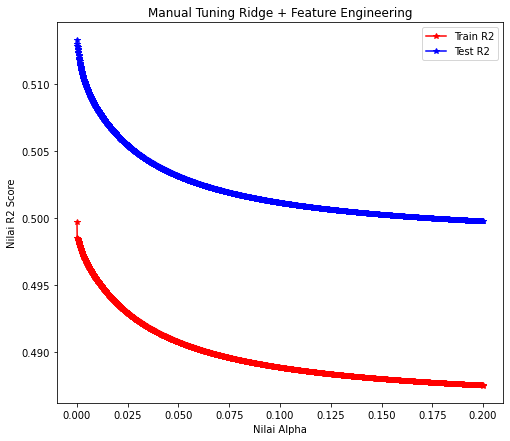

In [81]:
plt.figure(figsize=(8,7))
plt.plot(Alpha, train_ridge, 'r*-')
plt.plot(Alpha, test_ridge, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Ridge + Feature Engineering")
plt.xlabel('Nilai Alpha')
plt.ylabel('Nilai R2 Score')
plt.show()

In [82]:
## Applying the manual tuning def function to Lasso algorithm

train_Lasso, test_Lasso = Manual_Tune(Alpha, X_train_1, X_test_1, y_train_1, y_test_1, Lasso)

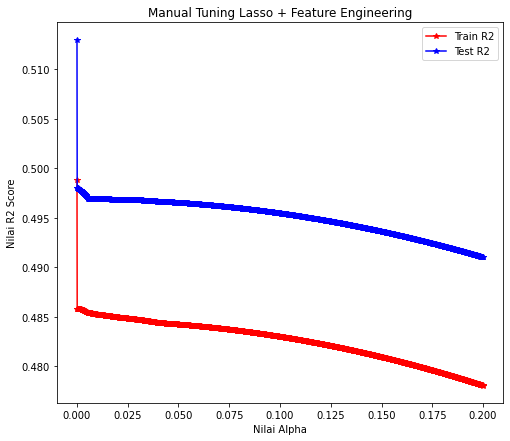

In [83]:
plt.figure(figsize=(8,7))
plt.plot(Alpha, train_Lasso, 'r*-')
plt.plot(Alpha, test_Lasso, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Lasso + Feature Engineering")
plt.xlabel('Nilai Alpha')
plt.ylabel('Nilai R2 Score')
plt.show()

In [84]:
## Applying the manual tuning def function to ElasticNet algorithm

train_Enet, test_Enet = Manual_Tune(Alpha, X_train_1, X_test_1, y_train_1, y_test_1, ElasticNet)

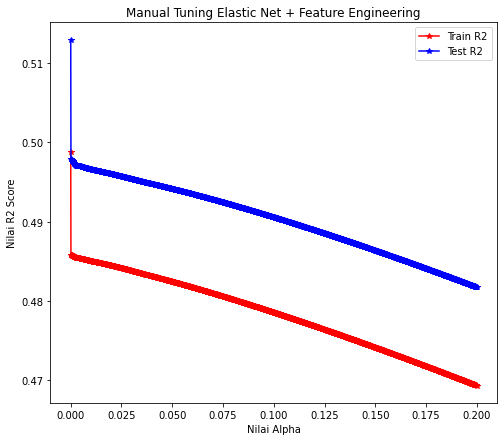

In [85]:
plt.figure(figsize=(8,7))
plt.plot(Alpha, train_Enet, 'r*-')
plt.plot(Alpha, test_Enet, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Elastic Net + Feature Engineering")
plt.xlabel('Nilai Alpha')
plt.ylabel('Nilai R2 Score')
plt.show()

In [87]:
## Best Alpha for Lasso algorithm

Alpha[np.argmax(test_Lasso)]

0.0

In [88]:
best_a_L = Alpha[np.argmax(test_Lasso)]

In [89]:
## Best Alpha for Ridge algorithm


Alpha[np.argmax(test_ridge)]

0.0

In [90]:
best_a_R = Alpha[np.argmax(test_ridge)]

In [91]:
## Best Alpha for ElasticNet algorithm


Alpha[np.argmax(test_Enet)]

0.0

In [92]:
best_a_E = Alpha[np.argmax(test_Enet)]

## **Evaluation Matrix for Algorithms with Feature Engineering + Manual Tuning**

In [93]:
model_R_pow, df_Ridge_pow = Eva_Matrix_Base(Ridge(alpha=best_a_R), X_train_1, X_test_1, y_train_1, y_test_1, "Ridge Tuned + Pow")

df_Ridge_pow

,Training Ridge Tuned + Pow,Testing Ridge Tuned + Pow
R2,0.499713,0.513279
MAE,3.573487,3.433446
MSE,46.188008,41.345884
RMSE,6.796176,6.430077


In [94]:
model_L_pow, df_Lasso_pow = Eva_Matrix_Base(Lasso(alpha=best_a_L), X_train_1, X_test_1, y_train_1, y_test_1, "Lasso Tuned + Pow")

df_Lasso_pow

,Training Lasso Tuned + Pow,Testing Lasso Tuned + Pow
R2,0.498801,0.512977
MAE,3.575792,3.438468
MSE,46.272215,41.371550
RMSE,6.802368,6.432072


In [95]:
model_E_pow, df_Enet_pow = Eva_Matrix_Base(ElasticNet(alpha=best_a_E), X_train_1, X_test_1, y_train_1, y_test_1, "ElasticNet Tuned + Pow")

df_Enet_pow

,Training ElasticNet Tuned + Pow,Testing ElasticNet Tuned + Pow
R2,0.498801,0.512977
MAE,3.575792,3.438468
MSE,46.272215,41.371550
RMSE,6.802368,6.432072


## Evaluation Matrix on Base Model

In [96]:
pd.concat([df_LinReg, df_ridge, df_Lasso, df_enet], axis=1).T

,R2,MAE,MSE,RMSE
TrainingLinReg,0.002133,6.012494,92.126114,9.598235
TestingLinReg,0.003077,5.744713,84.686428,9.202523
TrainingRidge,0.016011,5.942780,90.844816,9.531255
TestingRidge,0.017165,5.678294,83.489652,9.137267
Training Lasso,0.011047,5.970088,91.303112,9.555266
Testing Lasso,0.009871,5.703573,84.109328,9.171114
TrainingElasticNet,0.013784,5.956253,91.050468,9.542037
TestingElasticNet,0.014032,5.689524,83.755871,9.151823


## Evaluation Matrix Before Tuning for Model with Power Transformer 

In [97]:
pd.concat([df_LinReg2, df_ridge2, df_Lasso2, df_enet2], axis=1).T

,R2,MAE,MSE,RMSE
Training LinReg 2,0.498710,3.578212,46.280580,6.802983
Testing LinReg 2,0.513402,3.437498,41.335457,6.429266
Training Ridge,0.486179,3.639472,47.437522,6.887490
Testing Ridge,0.498328,3.516353,42.615923,6.528087
Training Lasso,0.418618,3.903154,53.674974,7.326321
Testing Lasso,0.431352,3.741667,48.305417,6.950210
Training ElasticNet,0.409752,3.975754,54.493488,7.381970
Testing ElasticNet,0.418252,3.823235,49.418263,7.029812


## Evaluation Matrix After Tuning for Model with Power Transformer 

In [98]:
pd.concat([df_LinReg2, df_Ridge_pow, df_Lasso_pow, df_Enet_pow], axis=1).T

,R2,MAE,MSE,RMSE
Training LinReg 2,0.498710,3.578212,46.280580,6.802983
Testing LinReg 2,0.513402,3.437498,41.335457,6.429266
Training Ridge Tuned + Pow,0.499713,3.573487,46.188008,6.796176
Testing Ridge Tuned + Pow,0.513279,3.433446,41.345884,6.430077
Training Lasso Tuned + Pow,0.498801,3.575792,46.272215,6.802368
Testing Lasso Tuned + Pow,0.512977,3.438468,41.371550,6.432072
Training ElasticNet Tuned + Pow,0.498801,3.575792,46.272215,6.802368
Testing ElasticNet Tuned + Pow,0.512977,3.438468,41.371550,6.432072


## **Conclusion**

We have succeeded to improve the evaluation matrix scoring of the model with feature transformation and regularization with the best scoring model is Ridge with power transformation and manual tuning.